<a href="https://colab.research.google.com/github/izanfadlullah/MachineLearning/blob/main/MLProject1_IFBI_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SUPERVISED MACHINE LEARNING
# REGRESSION - Simple Linear Regression

# Import All Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Stage 1 : Data Gathering
data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Grade_Set_1.csv')
data

,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [ ]:
# Stage 2 : EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      object
 3   Result         9 non-null      object
dtypes: int64(2), object(2)
memory usage: 420.0+ bytes


In [ ]:
# Stage 3 : Data Preparation
# handle missing values
# remove duplicate records
# convert non-numerical features into numerical
# normalization
# select independent and dependent variable

In [ ]:
# handle missing values
data.isnull().sum()

,0
Hours_Studied,0
Test_Grade,0
Status,0
Result,0


In [ ]:
# remove duplicate records
data.duplicated().sum()

np.int64(0)

In [ ]:
# convert non-numerical features into numerical
# categorical data --> yes/no true/false fail/pass correct/wrong ---> 0 / 1
import sklearn.preprocessing as pp
lb = pp.LabelBinarizer()

In [ ]:
data.Status = lb.fit_transform(data.Status)

In [ ]:
lb.fit_transform(['yes','no'])

array([[1],
       [0]])

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      int64 
 3   Result         9 non-null      object
dtypes: int64(3), object(1)
memory usage: 420.0+ bytes


In [ ]:
'''
                       example dataset where features have a different range
  age       income
  18        2000        0.002036659877800407
  19        4500        0.0274949083503055
  20        1800
  21        100000
  22         50000
  23         12000
  24         80000

'''

'\n                       example dataset where features have a different range\n  age       income\n  18        2000        0.002036659877800407\n  19        4500        0.0274949083503055\n  20        1800\n  21        100000\n  22         50000\n  23         12000\n  24         80000\n\n'

In [ ]:
# d.) normalization
# For machine learning, every dataset does not require normalization. It is
# required only when features have different ranges.

# The goal of normalization is to change the values of numeric
# columns in the dataset to a common scale.

# when you normalize your data you're not changing its meaning --> you're just changing
# its scale so that the model can learn efficiently

# after normalization features are on comparable scale

# 2000 <---> 0.002036659877800407
# model trains on 0.002 instead of 2000

'''
                       example dataset where features have a different range
  age       income
  18        2000        0.002036659877800407
  19        4500        0.0274949083503055
  20        1800
  21        100000
  22         50000
  23         12000
  24         80000


  min = 1800
  max = 100000
  x   = 2000

  Xnorm = (X-Xmin) / (Xmax - Xmin)

  Xnorm = (2000-1800) / (100000-1800)
  Xnorm = 0.002036659877800407


  Xnorm = (4500-1800) / (100000-1800)
  Xnorm =  0.0274949083503055

'''

'\n                       example dataset where features have a different range\n  age       income\n  18        2000        0.002036659877800407\n  19        4500        0.0274949083503055\n  20        1800\n  21        100000\n  22         50000\n  23         12000\n  24         80000\n\n\n  min = 1800\n  max = 100000\n  x   = 2000\n\n  Xnorm = (X-Xmin) / (Xmax - Xmin)\n\n  Xnorm = (2000-1800) / (100000-1800)\n  Xnorm = 0.002036659877800407\n\n\n  Xnorm = (4500-1800) / (100000-1800)\n  Xnorm =  0.0274949083503055\n\n'

In [ ]:
# select independent and dependent variable

# X --> independent variable
# scikit-learn expects X to be 2D even if you have one feature

X = data.Hours_Studied.values
X = X.reshape(9,1)
X

array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
# Y ---> dependent variable
Y = data.Test_Grade.values
Y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [ ]:
# Stage 4 : Model Development [Apply A Suitable ML Algo on Dataset]

import sklearn.linear_model as lm
lin_reg = lm.LinearRegression()

In [ ]:
lin_reg.fit(X,Y)

LinearRegression()

In [ ]:
# Pickle can be used to save our trained module
import pickle
pickle.dump(lm, open('multiple_regression_model.pkl', 'wb')) # w --> Write b --> byte stream

In [ ]:
# Stage 5 : Model Evaluation
data['predicted value'] = lin_reg.predict(X)

In [ ]:
data[['Hours_Studied', 'Test_Grade', 'predicted value']]

,Hours_Studied,Test_Grade,predicted value
0,2,57,59.711111
1,3,66,64.727778
2,4,73,69.744444
3,5,76,74.761111
4,6,79,79.777778
5,7,81,84.794444
6,8,90,89.811111
7,9,96,94.827778
8,10,100,99.844444


In [ ]:
pred_values = data['predicted value'].values
pred_values

array([59.71111111, 64.72777778, 69.74444444, 74.76111111, 79.77777778,
       84.79444444, 89.81111111, 94.82777778, 99.84444444])

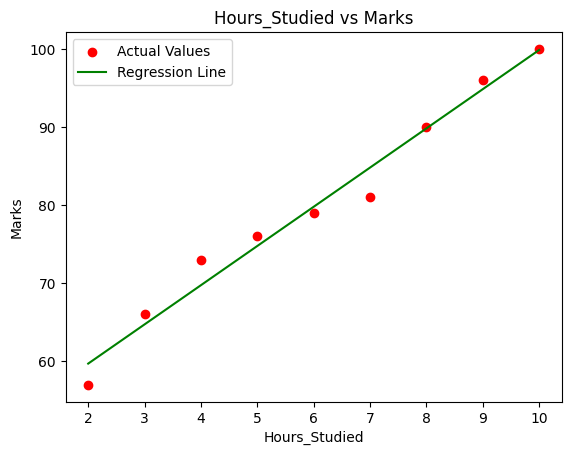

In [ ]:
# plot actual values
plt.scatter(X, Y, color = 'red', label='Actual Values')
# plot the regression line
plt.plot(X, pred_values, color = 'green', label='Regression Line')
plt.title('Hours_Studied vs Marks')
plt.xlabel('Hours_Studied')
plt.ylabel('Marks')
plt.legend()
plt.show()

In [ ]:
# R-squared
# after fitting the line we want to know how well the line explains the data - that's where R2 comes in
# regression score function

from sklearn.metrics import r2_score
regressionScore = r2_score(Y, pred_values)
print('Regression Score Function:',regressionScore)
print(f'Regression Score Function: {int(regressionScore*100)}%')

Regression Score Function: 0.9757431074095347
Regression Score Function: 97%


In [ ]:
# Stage 6 : Final Prediction
hrs = float(input('Enter the number of hours studied: '))
marks = lin_reg.predict([[hrs]])
print(f'You Score {int(marks[0])} Marks')

Enter the number of hours studied: 5
You Score 74 Marks


In [ ]:
hrs = float(input('HOw Many Hours You Studied In A day' ))
if hrs>=1 and hrs<=10:
  marks = lin_reg.predict([[hrs]])
  (f'You Score {int(marks[0])} Marks')
else:
  print('PLease ENter the Hours Between 1 till 10')

HOw Many Hours You Studied In A day67
PLease ENter the Hours Between 1 till 10
